<a href="https://colab.research.google.com/github/kzar1n/datascience/blob/master/Trabalho_Precifica%C3%A7%C3%A3o_de_Im%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importando as bibliotecas**

In [0]:
!pip install seaborn==0.9.0
!pip install descartes
!pip install geopy
!pip install geopandas

    100% |████████████████████████████████| 931kB 20.0MB/s 
    100% |████████████████████████████████| 17.9MB 1.7MB/s 
    100% |████████████████████████████████| 10.8MB 815kB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
from IPython.display import clear_output
from pathlib import Path
from shapely.geometry import Polygon, Point, LineString, MultiPolygon
from descartes import PolygonPatch
from geopy.geocoders import Bing, ArcGIS

import timeit
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


print(sns.__version__)

%matplotlib inline

0.9.0


## Importando os arquivos

In [0]:
# arquivo = 'https://github.com/kzar1n/datascience/blob/master/PesquisaMercadoCompleta_2008.xlsx?raw=true'
arquivo = 'https://bit.ly/2T5vklu'
PesquisaMercadoCompleta_2008 = pd.read_excel(arquivo)

In [0]:
# arquivo = 'https://github.com/kzar1n/datascience/blob/master/PesquisaMercadoCompleta_2008_2012.xlsx?raw=true'
arquivo = 'https://bit.ly/2NyrNWG'
PesquisaMercadoCompleta_2008_2012 = pd.read_excel(arquivo)

In [0]:
# arquivo = 'https://github.com/kzar1n/datascience/blob/master/PesquisaMercadoCompleta_2013_2017.xlsx?raw=true'
arquivo = 'https://bit.ly/2EEd0XN'
PesquisaMercadoCompleta_2013_2017 = pd.read_excel(arquivo)

In [0]:
#arquivo = 'https://github.com/kzar1n/datascience/blob/master/PesquisaMercadoCompleta_2018_2019.xlsx?raw=true'
arquivo = 'https://bit.ly/2tK6xnQ'
PesquisaMercadoCompleta_2018_2019 = pd.read_excel(arquivo)

## Preparando dataset

Concatenando bases

In [0]:
data = pd.concat([PesquisaMercadoCompleta_2008, 
                  PesquisaMercadoCompleta_2008_2012,
                  PesquisaMercadoCompleta_2013_2017,
                  PesquisaMercadoCompleta_2018_2019])

Verificando totais

In [0]:
print('PesquisaMercadoCompleta_2008: ', PesquisaMercadoCompleta_2008.shape )
print('PesquisaMercadoCompleta_2008_2012: ', PesquisaMercadoCompleta_2008_2012.shape)
print('PesquisaMercadoCompleta_2013_2017: ', PesquisaMercadoCompleta_2013_2017.shape)
print('PesquisaMercadoCompleta_2018_2019: ', PesquisaMercadoCompleta_2018_2019.shape)
print('Data: ', data.shape)

PesquisaMercadoCompleta_2008:  (854, 74)
PesquisaMercadoCompleta_2008_2012:  (3665, 74)
PesquisaMercadoCompleta_2013_2017:  (5121, 74)
PesquisaMercadoCompleta_2018_2019:  (1102, 74)
Data:  (10742, 74)


Exibindo informações da base

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10742 entries, 0 to 1101
Data columns (total 74 columns):
RGI                                                10742 non-null int64
Código no Mapa                                     10742 non-null int64
Empreendimento                                     10742 non-null object
Edifício                                           4099 non-null object
Zona de Valor                                      10742 non-null object
Endereço                                           10742 non-null object
Bairro                                             10742 non-null object
Distrito                                           10742 non-null object
Região                                             10742 non-null object
Cidade                                             10742 non-null object
UF                                                 10742 non-null object
CEP                                                10742 non-null object
Zoneamento         

Selecionando apenas as variáveis que vamos trabalhar

In [0]:
data = pd.DataFrame(data, columns = ['Endereço', 
                                     'Bairro',
                                     'Distrito',
                                     'Região', 
                                     'Cidade',
                                     'UF', 
                                     'CEP', 
                                     'Zoneamento', 
                                     'Setor', 
                                     'Quadra', 
                                     'Data Entrega',
                                     'Tipologia',
                                     'Classificação do tipo',
                                     'Padrão',
                                     'Área Terreno',
                                     'Área Total Construída',
                                     'Torres',
                                     'Condições de pagamento',
                                     'Data Lançamento',
                                     'Nº de Elevadores',
                                     'Dormitórios', 
                                     'Suítes', 
                                     'Banheiros', 
                                     'Nº Vagas', 
                                     'Área Privativa',
                                     'Área Total',
                                     'Nº Unidades por Pavimento', 
                                     'Nº de Pavimentos',
                                     '(VMU)Preço de venda da unidade no lançamento',
                                     '(VUV)Preço m2 privativo no lançamento',
                                     '% Unidades Vendidas',
                                     'Unidades Vendidas'])

In [0]:
data.to_csv('dados_imoveis.csv', index=False)

data.shape

(10742, 32)

In [0]:
x = pd.read_csv('dados_imoveis.csv')
x.shape


(10742, 32)

## Análises

Matriz de correlações

Matriz de correlações (gráfica)

Verificando as correlações com o preço de venda

In [0]:
data.corr()['(VUV)Preço m2 privativo no lançamento'].sort_values(ascending=False)

(VUV)Preço m2 privativo no lançamento           1.000000
(VMU)Preço de venda da unidade no lançamento    0.521937
Área Privativa                                  0.196459
Suítes                                          0.194571
Nº Vagas                                        0.182089
Área Total                                      0.168590
Banheiros                                       0.128984
Nº de Pavimentos                                0.119796
Nº de Elevadores                                0.110237
Nº Unidades por Pavimento                       0.057796
Área Total Construída                          -0.048054
Setor                                          -0.085213
Área Terreno                                   -0.085277
Quadra                                         -0.106298
Dormitórios                                    -0.132033
Torres                                         -0.254944
Unidades Vendidas                              -0.260439
% Unidades Vendidas            

Criando variavel de ano de lançamento

In [0]:
data['Data Lançamento'] = pd.to_datetime(data['Data Lançamento'])
data['Ano Lançamento'] = data['Data Lançamento'].dt.year
pd.unique(data['Ano Lançamento'].sort_values())

plot = data.groupby(['Região', 'Ano Lançamento'])['(VUV)Preço m2 privativo no lançamento'].mean()
plot = pd.DataFrame(plot).reset_index()

#plot = plot.pivot(index='Região',
#          columns='Ano Lançamento',
#          values='Área Privativa')

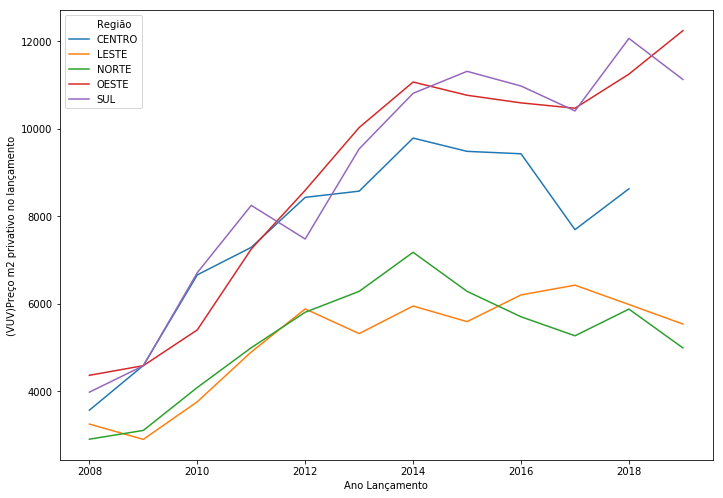

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.axes_style("whitegrid")

x = sns.lineplot(data=plot, 
                 x='Ano Lançamento', 
                 y='(VUV)Preço m2 privativo no lançamento', 
                 hue='Região'
                ).get_figure()  

x.savefig('media do valor do m² regiao e data.png', bbox_size='tight', dpi=200, quality=80)

Valor do m2 por bairro

In [0]:
media_bairros = data['(VUV)Preço m2 privativo no lançamento'].groupby(by=data['Bairro']).mean()
media_bairros = pd.DataFrame(media_bairros)
media_bairros = media_bairros.sort_values('(VUV)Preço m2 privativo no lançamento', ascending=False)
media_bairros.reset_index(inplace=True)
media_bairros.columns = ['Bairro', 'Valor M2']
media_bairros.to_excel('valor por bairro.xlsx')

media_bairros.head()

,Bairro,Valor M2
0,PACAEMBU,30000.000000
1,CERQUEIRA CESAR,19739.009636
2,JARDIM EUROPA,18078.135000
3,ITAIM BIBI,16812.552609
4,JARDIM PAULISTA,16652.551343


Distribuição do valor M2 pela área util total

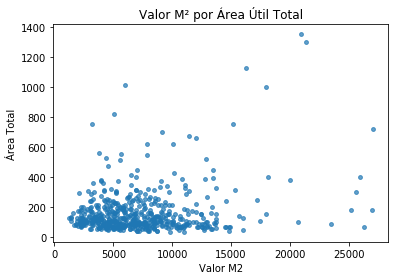

In [0]:
amostra = data.sample(frac=0.05)

fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(amostra['(VUV)Preço m2 privativo no lançamento'], amostra['Área Total'],
                            s=15,
                            alpha=0.7)

ax.set_xlabel('Valor M2')
ax.set_ylabel('Área Total')
ax.set_title('Valor M² por Área Útil Total')


# plt.figure(figsize=(12,8))

plt.savefig('valor por area total.png', bbox_size='tight', dpi=200, quality=80)

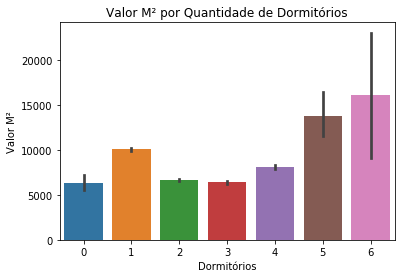

In [0]:
fig = sns.barplot(data = data, 
            #hue='Dormitórios', 
            x = 'Dormitórios', 
            y = '(VUV)Preço m2 privativo no lançamento')

fig.set_xlabel('Dormitórios')
fig.set_ylabel('Valor M²')
fig.set_title('Valor M² por Quantidade de Dormitórios')

x = fig.get_figure()

x.savefig("valor por quantide de dormitorios.png", dpi=200, quality=80)

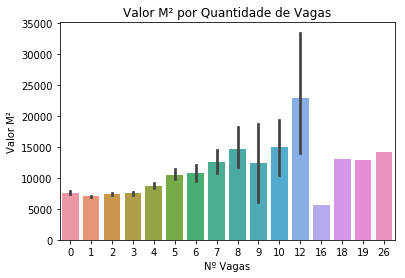

In [0]:
fig = sns.barplot(data = data, 
            #hue='Nº Vagas', 
            x = 'Nº Vagas', 
            y = '(VUV)Preço m2 privativo no lançamento')

fig.set_xlabel('Nº Vagas')
fig.set_ylabel('Valor M²')
fig.set_title('Valor M² por Quantidade de Vagas')

x = fig.get_figure()

x.savefig("valor por quantide de vagas.png", dpi=200, quality=80)

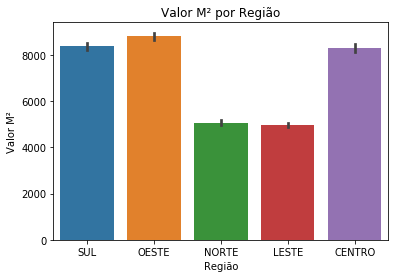

In [0]:
fig = sns.barplot(data = data, 
            #hue='Regiãos', 
            x = 'Região', 
            y = '(VUV)Preço m2 privativo no lançamento')

fig.set_xlabel('Região')
fig.set_ylabel('Valor M²')
fig.set_title('Valor M² por Região')

x = fig.get_figure()

x.savefig("valor médio acumulado por região.png", dpi=200, quality=80)

In [0]:
min = data['(VUV)Preço m2 privativo no lançamento'].groupby(by=data['Região']).min()
max = data['(VUV)Preço m2 privativo no lançamento'].groupby(by=data['Região']).max()
mean = data['(VUV)Preço m2 privativo no lançamento'].groupby(by=data['Região']).mean()
median = data['(VUV)Preço m2 privativo no lançamento'].groupby(by=data['Região']).median()
std = data['(VUV)Preço m2 privativo no lançamento'].groupby(by=data['Região']).std()



regiao = pd.concat([mean, median, min, max, std], axis=1)
regiao.columns = ['Média','Mediana','Mínimo','Máximo', 'Desvio']

regiao.to_excel('detalhes por regiao.xlsx')
regiao

,Média,Mediana,Mínimo,Máximo,Desvio
Região,,,,,
CENTRO,8301.359763,8005.355,1470.59,23232.17,2912.847750
LESTE,4962.565964,4717.040,1189.45,16714.24,2010.759846
NORTE,5069.210754,5034.920,1100.00,11779.66,1926.203755
OESTE,8813.888389,8601.610,1855.25,30000.00,3928.999672
SUL,8378.372989,7378.100,1221.53,49330.43,4923.290274


## Geolocalização

Criando dataframe de localização com o endereço completo e tirando os duplicados para não sobrecarregar a API de geocodificação

In [0]:
data['end_original'] = data['Endereço'] + ", " + data['Bairro'] + ", " + data['UF'] + ", " + data['Cidade'] + ", " + data['CEP']

data_local = pd.DataFrame()
data_local['end_original'] = data['end_original']
data_local.drop_duplicates(inplace=True)
data_local.reset_index(inplace=True, drop=True)


data_local.shape

(2658, 1)

Instanciando o objeto geodecodificador

In [0]:
api_key = 'Am0Znblz-vMtAx-tV1rlNWBnJILE0IQTBK4fKjnJ_o2c0o4sEKpEdIyQCEdEjbtI'
geocoder = Bing(api_key, timeout = 10)
# geocoder = ArcGIS(timeout = 10)

**Atenção... essa célula demora para executar completamente..**

---

Lógica para geodecodificar um endereço de cada vez. Isso é necessário para que a API de geodecodificação não dê timeout

Depois de executada a API, salva em um arquivo externo e caso seja necessário buscar a informação novamente, busca-se os dados salvos em arquivo

In [0]:
data_local['end_geocod'] = np.nan
my_file = Path("data_local.csv")
tamanho = data_local.shape[0]
x = 0

if my_file.is_file():
  data_local = pd.read_csv(my_file, index_col=False) # leitura do arquivo caso ja tenha sido gerado
else:
  porcentagem = 0
  start = timeit.default_timer()

  for i in range(0, tamanho):
    data_local['end_geocod'][i:i+1] = data_local['end_original'][i:i+1].apply(geocoder.geocode) # chamada do geocoder
    porcentagem = (i / tamanho) * 100
    x = x + ((1 / tamanho) * 100)
    if (x >= 1) or (i >= tamanho): # atualização do percentual de completude
      clear_output()
      print("%2.1f " % porcentagem, "%")
      x=0

  stop = timeit.default_timer()
  print('Aproximadamente ', round((stop - start)/60), ' min de processamento...')
  
  data_local['Latitude'] = data_local['end_geocod'].apply(lambda x: x.latitude if x != None else None)
  data_local['Longitude'] = data_local['end_geocod'].apply(lambda x: x.longitude if x != None else None)
  
  data_local.to_csv(my_file, index=False) # gravação do arquivo de bkp

Juntando a base original com as coordenadas encontradas

In [0]:
data = pd.merge(data, data_local, how='left', on='end_original')

Criando GeoDataFrame e alterando CRS

In [0]:
crs = {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

geometry = [Point(x) for x in zip(data.Longitude, data.Latitude)]
geo_data = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)

to_crs = '+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'
geo_data = geo_data.to_crs(to_crs)

geo_data['geometry'].head()


0    POINT (327.5563428040531 7390.90349385406)
1    POINT (327.5563428040531 7390.90349385406)
2    POINT (327.5563428040531 7390.90349385406)
3    POINT (327.5563428040531 7390.90349385406)
4    POINT (327.5563428040531 7390.90349385406)
Name: geometry, dtype: object

Plotando imóveis

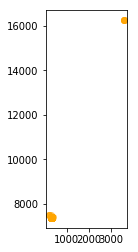

In [0]:
geo_data.plot(color='orange', alpha=0.2)

Importando shapefile da cidade de São Paulo

In [0]:
sp = gpd.read_file('35MUE250GC_SIR.shp')
sp = sp[sp['NM_MUNICIP'] == 'SÃO PAULO']
sp = sp.to_crs(to_crs)

sp.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

Identificando outliers

In [0]:
sp

,NM_MUNICIP,CD_GEOCMU,geometry
564,SÃO PAULO,3550308,"POLYGON ((341.9461756385033 7416.013104302863,..."


In [0]:
out = [not x for x in geo_data['geometry'].within(sp.iloc[0].geometry)]
fora_de_sp = geo_data[out]

Descartando outliers (imóveis fora de sp)

In [0]:
geo_data = geo_data[geo_data['geometry'].within(sp.iloc[0].geometry)]

In [0]:
type(geo_data)

geopandas.geodataframe.GeoDataFrame

In [0]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10711 entries, 0 to 10741
Data columns (total 38 columns):
Endereço                                        10711 non-null object
Bairro                                          10711 non-null object
Distrito                                        10711 non-null object
Região                                          10711 non-null object
Cidade                                          10711 non-null object
UF                                              10711 non-null object
CEP                                             10711 non-null object
Zoneamento                                      10547 non-null object
Setor                                           10711 non-null int64
Quadra                                          10711 non-null int64
Data Entrega                                    10711 non-null datetime64[ns]
Tipologia                                       10711 non-null object
Classificação do tipo                

In [0]:
geo_data['Data Lançamento'] = geo_data['Data Lançamento'].astype(str)
geo_data['Data Entrega'] = geo_data['Data Entrega'].astype(str)

In [0]:
geo_data.to_file('IMOVEIS_LOCALIZADOS.shp', encoding='utf-8')

Plotando mapa de SP com os imóveis

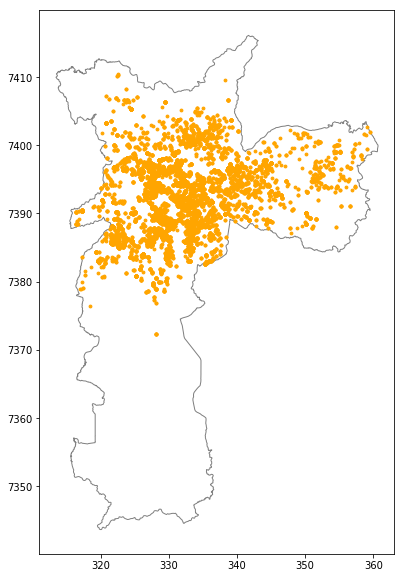

In [0]:
base = sp['geometry'].plot(color='white', edgecolor='grey', figsize=(8,10))
geo_data.plot(ax=base, markersize=8, color='orange')

#base.set_title('Distribuição das vendas em São Paulo')

fig = base.get_figure()

fig.savefig("sp.png", dpi=150, quality=80)

Importando dataset com todas as escolas de São Paulo

In [0]:
path = 'escolasr34jun18.csv'
escolas = pd.read_csv(path, sep=';')
escolas = pd.DataFrame(escolas, columns=['NOMESC', 'LATITUDE', 'LONGITUDE'])

geometry = [Point(x) for x in zip(escolas.LONGITUDE, escolas.LATITUDE)]
escolas = gpd.GeoDataFrame(escolas, crs=crs, geometry=geometry)

escolas = escolas.to_crs(to_crs)

escolas.head()

,NOMESC,LATITUDE,LONGITUDE,geometry
0,"ALOYSIO DE MENEZES GREENHALGH, VER.",-23.557659,-46.759414,POINT (320.4224276639084 7393.643152137831)
1,"ANTONIO JOAO ABDALLA, DR.",-23.592218,-46.783406,POINT (318.0207655277586 7389.785655955989)
2,"BENEDICTO ROCHA, VER.",-23.591597,-46.754998,POINT (320.9193077570228 7389.890270755835)
3,CIDADE DE GENEBRA,-23.585119,-46.804457,POINT (315.8623211036468 7390.544906715535)
4,COHAB RAPOSO TAVARES,-23.586508,-46.800644,POINT (316.2534453752878 7390.395981971637)


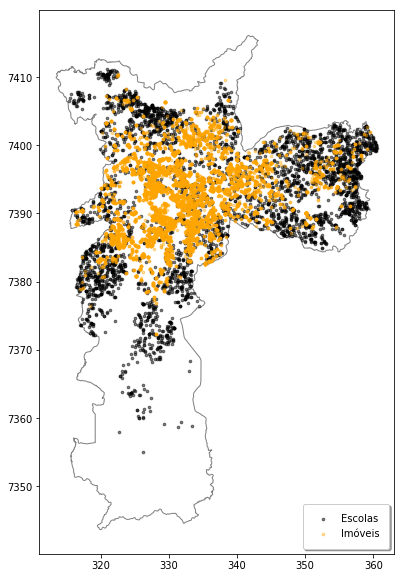

In [0]:

# fig, ax = plt.subplots(1, figsize=(4.5,10))
# lima_bank_num.plot(ax=ax, column='quant_cuts', cmap='Blues', alpha=1, legend=True)
# ax.legend(loc='lower left')




base = sp['geometry'].plot(color='white', edgecolor='grey', figsize=(8,10))
escolas.plot(ax=base, alpha=0.5, markersize=7, color='black', label='Escolas')
geo_data.plot(ax=base, alpha=0.4, markersize=7, color='orange', label='Imóveis')

leg = base.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='lower right')


fig = base.get_figure()

fig.savefig("escolas_sp.png", dpi=150, quality=80)

Relacionando todos os imoveis com todas as escolas e mantendo apenas a distancia da mais próxima

In [0]:
geo_data['dist_escola'] = geo_data['geometry'].apply(lambda x: escolas.distance(x).min())


In [0]:
geo_data['dist_escola'].corr(geo_data['(VUV)Preço m2 privativo no lançamento'])

0.23760254451965335

In [0]:
metro = pd.read_csv('estações metro.csv', sep=';')
metro['ENDEREÇO'] = metro['ENDEREÇO'] + ', São Paulo - SP, Brasil'
metro.head()

,ESTACAO,ENDEREÇO
0,JABAQUARA,"R. dos Jequitibás, 80, São Paulo - SP, Brasil"
1,CONCEIÇÃO,"Av. Armando de Arruda Pereira, 919, São Paulo ..."
2,SÃO JUDAS,"Av. Jabaquara, 2438, São Paulo - SP, Brasil"
3,SAÚDE,"Av. Jabaquara, 1634, São Paulo - SP, Brasil"
4,PÇA DA ÁRVORE,"Praça da Árvore, 39, Mirandópolis, São Paulo -..."


In [0]:
metro['end_geocod'] = metro['ENDEREÇO'].apply(geocoder.geocode) # chamada do geocoder
metro['Latitude'] = metro['end_geocod'].apply(lambda x: x.latitude if x != None else None)
metro['Longitude'] = metro['end_geocod'].apply(lambda x: x.longitude if x != None else None)

In [0]:
crs = {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

geometry = [Point(x) for x in zip(metro.Longitude, metro.Latitude)]
metro = gpd.GeoDataFrame(metro, crs=crs, geometry=geometry)

to_crs = '+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'
metro = metro.to_crs(to_crs)

metro['geometry'].head()

0    POINT (332.6310634378124 7383.921778775108)
1     POINT (332.6026088723069 7385.24758073942)
2    POINT (332.5864936073087 7386.251903514804)
3    POINT (332.7657214969753 7387.047800953334)
4    POINT (323.7015972063826 7408.332779972829)
Name: geometry, dtype: object

In [0]:
out = [not x for x in metro['geometry'].within(sp.iloc[0].geometry)]
fora_de_sp = metro[out]
fora_de_sp

,ESTACAO,ENDEREÇO,end_geocod,Latitude,Longitude,geometry


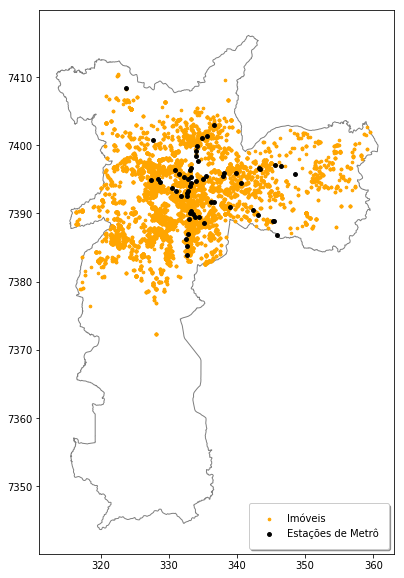

In [0]:
base = sp['geometry'].plot(color='white', edgecolor='grey', figsize=(8,10))

geo_data.plot(ax=base, markersize=7, color='orange', label = 'Imóveis')

metro.plot(ax=base, markersize=15, color='black', label='Estações de Metrô')

leg = base.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='lower right')

#base.set_title('xxxxxx')

fig = base.get_figure()

fig.savefig("metro_sp.png", dpi=150, quality=80)


In [0]:
geo_data['dist_metro'] = geo_data['geometry'].apply(lambda x: metro.distance(x).min())

In [0]:
sp_imoveis_metro = pd.DataFrame(geo_data)
sp_imoveis_metro.to_csv('sp_imoveis_metro.csv', sep=';', encoding='utf-8', decimal=',')

In [0]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10711 entries, 0 to 10741
Data columns (total 40 columns):
Endereço                                        10711 non-null object
Bairro                                          10711 non-null object
Distrito                                        10711 non-null object
Região                                          10711 non-null object
Cidade                                          10711 non-null object
UF                                              10711 non-null object
CEP                                             10711 non-null object
Zoneamento                                      10547 non-null object
Setor                                           10711 non-null int64
Quadra                                          10711 non-null int64
Data Entrega                                    10711 non-null object
Tipologia                                       10711 non-null object
Classificação do tipo                        

In [0]:
geo_data['dist_metro'].corr(geo_data['(VUV)Preço m2 privativo no lançamento'])

-0.2200484701755055

In [0]:
geo_data['Dormitórios'].corr(geo_data['(VUV)Preço m2 privativo no lançamento'])

-0.13253159836997927

In [0]:
geo_data['Banheiros'].corr(geo_data['(VUV)Preço m2 privativo no lançamento'])

0.12813416080400913

In [0]:
geo_data['Área Total'].corr(geo_data['(VUV)Preço m2 privativo no lançamento'])

0.16813205645246457

In [0]:
geo_data['Nº Vagas'].corr(geo_data['(VUV)Preço m2 privativo no lançamento'])

0.1810379486287107

In [0]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10711 entries, 0 to 10741
Data columns (total 40 columns):
Endereço                                        10711 non-null object
Bairro                                          10711 non-null object
Distrito                                        10711 non-null object
Região                                          10711 non-null object
Cidade                                          10711 non-null object
UF                                              10711 non-null object
CEP                                             10711 non-null object
Zoneamento                                      10547 non-null object
Setor                                           10711 non-null int64
Quadra                                          10711 non-null int64
Data Entrega                                    10711 non-null object
Tipologia                                       10711 non-null object
Classificação do tipo                        

In [0]:
matriz = pd.DataFrame(geo_data, columns = ['Torres',
                                 'Nº de Elevadores',
                                 'Dormitórios',
                                 'Suítes',
                                 'Banheiros',
                                 'Nº Vagas',
                                 'Área Privativa',
                                 'Área Total',
                                 'Nº Unidades por Pavimento',
                                 'Nº de Pavimentos',
                                 'Ano Lançamento',
                                 'dist_escola',
                                 'dist_metro',
                                 '(VUV)Preço m2 privativo no lançamento'])

m_rename = {'(VUV)Preço m2 privativo no lançamento': 'Preço m²',
           'dist_escola':'Distancia Escola',
           'dist_metro':'Distancia Metrô'}


matriz = matriz.rename(index=str, columns=m_rename)

cor = matriz.corr()
cor = cor.values

for x in range(len(cor)):
  for y in range(len(cor)):
    cor[x, y] = "{:0.2f}".format(cor[x, y])

<Figure size 432x288 with 0 Axes>

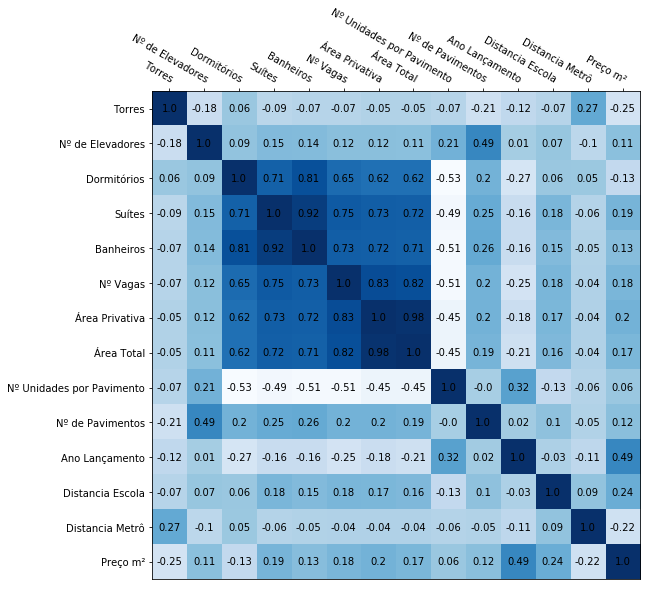

In [0]:
plt.set_cmap('Blues')

fig, ax = plt.subplots(figsize=(9, 9))
im = ax.imshow(cor)

# We want to show all ticks...
ax.set_xticks(np.arange(matriz.shape[1]))
ax.set_yticks(np.arange(matriz.shape[1]))
# ... and label them with the respective list entries
ax.set_xticklabels(matriz)
ax.set_yticklabels(matriz)

# Let the horizontal axes labeling appear on top.
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(matriz.shape[1]):
    for j in range(matriz.shape[1]):
        text = ax.text(j, i, cor[i, j],
                       ha="center", va="center", color="black")
        

        
fig.tight_layout()
plt.show()

fig = ax.get_figure()

fig.savefig("matriz.png", dpi=150, quality=80)